In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as snb


In [48]:
x=np.linspace(0,2*np.pi,100)
np.random.seed(321)
noise=np.random.normal(0,0.5,100)
y=np.sin(x) + noise
df = pd.DataFrame({'X':x,'Y':y})

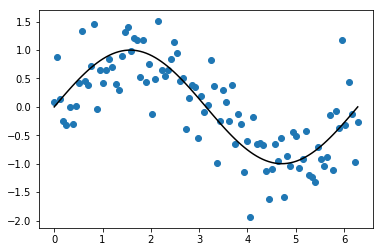

In [49]:
plt.scatter(df.X,df.Y)
plt.plot(df.X,np.sin(df.X),color='k')

In [50]:
df.to_csv('simulated.csv',index=False)

In [51]:
#LINEAR REGRESSION

df=pd.read_csv('simulated.csv')
pred=np.mean(df.Y)

print(pred)


-0.01725491729732495


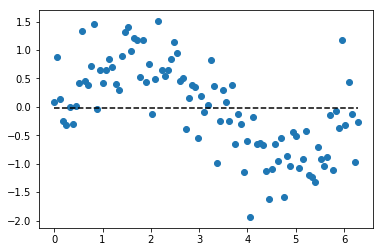

In [52]:
plt.scatter(df.X,df.Y)

plt.plot(df.X,[pred] * len(df.X),'k--')

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm=LinearRegression()
features=df.drop('Y',axis=1)
target=df.Y

lm.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
print(lm.intercept_)
print(lm.coef_)

0.8238675120273314
[-0.26773758]


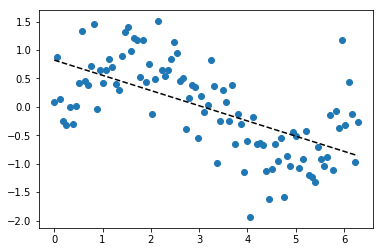

In [56]:
plt.scatter(df.X,df.Y)
plt.plot(df.X,lm.predict(features),'k--')

In [57]:
x=np.array([0])
x=x.reshape(1,-1)
lm.predict(x)

array([0.82386751])

In [58]:
df_copy=df.copy()

df_copy['x2'] =np.power(df_copy.X,2)

In [59]:
lm =LinearRegression()

features=df_copy.drop('Y',axis=1)
target=df_copy.Y

lm.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

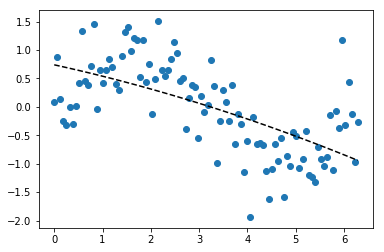

In [60]:
plt.scatter(df_copy.X,df_copy.Y)



plt.plot(df_copy.X,lm.predict(features),'k--')

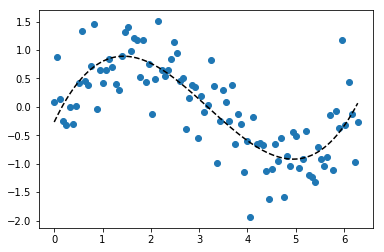

In [61]:
df_copy1=df.copy()
df_copy1['x2']=np.power(df.X,2)
df_copy1['x3']=np.power(df.X,3)
lm=LinearRegression()

features=df_copy1.drop('Y',axis=1)

target=df_copy1.Y

lm.fit(features,target)
plt.scatter(df_copy1.X,df_copy1.Y)
plt.plot(df_copy1.X,lm.predict(features),'k--')



In [86]:
def fit_and_plot_model(df,model):
    
    features=df.drop('Y',axis=1)
    target=df.Y
    
    model.fit(features,target)
    
    plt.scatter(df.X,df.Y)
    
    plt.plot(df.X,model.predict(features),'k--')
    
    
    return model






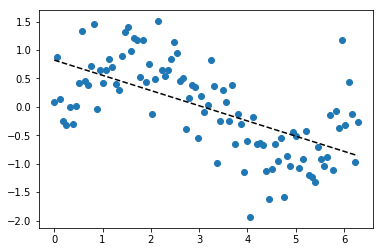

In [63]:
lm=LinearRegression()

a=fit_and_plot_model(df,lm)

In [77]:
def fit_plot_polynomial_model(df,model,order=1):
    df_copy=df.copy()
    
    if order == 1:
        return fit_and_plot_model(df_copy,model)
    else :
        for power in range(2,order+1):
            df_copy['x{}'.format(power)]=np.power(df_copy.X,power)
                
        return fit_and_plot_model(df_copy,model)        

-0.2660730269168686
[ 1.78503241 -0.80157967  0.08369575]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

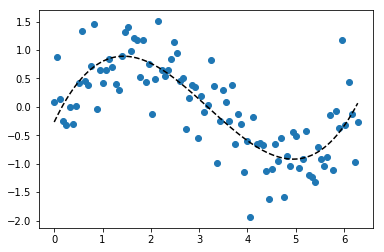

In [83]:
fit_plot_polynomial_model(df,lm,3)

In [80]:
###simple models have to be taken
#decision tree
#tuning
#apply constraints to 

In [84]:
from sklearn.tree import DecisionTreeRegressor

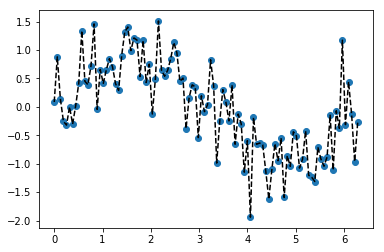

In [87]:
model=fit_and_plot_model(df,DecisionTreeRegressor())


In [89]:
np.sum(np.absolute(df.Y-model.predict(df.drop('Y',axis=1))))

0.0

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

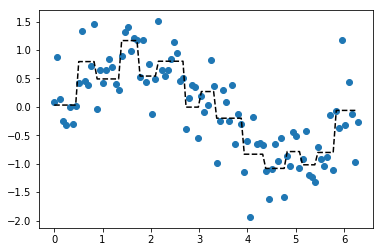

In [98]:
fit_and_plot_model(df,DecisionTreeRegressor(min_samples_leaf=5))

In [99]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\hp pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

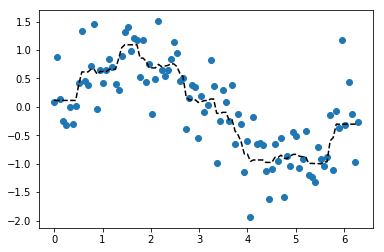

In [107]:

fit_and_plot_model(df,RandomForestRegressor(random_state=123,min_samples_leaf=5))

In [108]:
def engineer_polynomial_features(df,max_polynomial=1):
    df_copy=df.copy()
    if max_polynomial==1:
        return df_copy
    else:
        for power in range(2,max_polynomial+1):
            df_copy['x{}'.format(power)]=np.power(df_copy.X,power)
        return df_copy    

In [109]:
def fit_and_plot_polynomial_model(df,model,max_polynomial=1):
    return fit_and_plot_model(engineer_polynomial_features(df,max_polynomial),model)

In [110]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
